# Training 


In [1]:
import numpy as np
import pandas as pd
import os
import sys  
sys.path.append(".")

# deep learning
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

/opt/anaconda3/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.7/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <3224DED3-FCE0-3B10-9D68-9EC019B2AFEC> /opt/anaconda3/lib/python3.7/site-packages/torchvision/image.so
  Expected in:     <7EC12623-0CF1-3739-8CBB-242EFC29E2B3> /opt/anaconda3/lib/python3.7/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


# Setup

In [6]:
# Check version of Pytorch
print(torch. __version__)

1.13.1


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Data


In [4]:
from data import data_cleaning

##  Training data tabular
#data_df = data_cleaning.create_feature_df()
data_df = pd.read_csv("../data/tables/features.csv")
data_df

,Brand_Name,Brand_ID,Model_Name,Model_ID,Bodytype,Launch_Year,Color,Advertiser_ID,Image_ID,Viewpoint,file_path
0,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,1,image_1.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$1$$image_...
1,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_11.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
2,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_16.jpg,0,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
3,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_18.jpg,270,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
4,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_2.jpg,180,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
...,...,...,...,...,...,...,...,...,...,...,...
271318,Zenos,99,E10,99_1,Convertible,2016,Grey,3,image_7.jpg,90,Zenos$$E10$$2016$$Grey$$99_1$$3$$image_7.jpg
271319,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_0.jpg,225,Zenos$$E10$$2016$$Red$$99_1$$1$$image_0.jpg
271320,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_3.jpg,315,Zenos$$E10$$2016$$Red$$99_1$$1$$image_3.jpg
271321,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_4.jpg,45,Zenos$$E10$$2016$$Red$$99_1$$1$$image_4.jpg


## training data (70%), validation set (10%), test data (20%)

In [2]:
from data.data_splitting import split_dataset_dfs

train_df, val_df, test_df = split_dataset_dfs("../raw_data/tables/features.csv")

In [3]:
train_df

,Brand_Name,Brand_ID,Model_Name,Model_ID,Bodytype,Launch_Year,Color,Advertiser_ID,Image_ID,Viewpoint,file_path
122,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_0.jpg,45,Abarth$$595$$2013$$Black$$2_4$$100$$image_0.jpg
123,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_1.jpg,0,Abarth$$595$$2013$$Black$$2_4$$100$$image_1.jpg
124,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_10.jpg,135,Abarth$$595$$2013$$Black$$2_4$$100$$image_10.jpg
125,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_11.jpg,135,Abarth$$595$$2013$$Black$$2_4$$100$$image_11.jpg
126,Abarth,2,595,2_4,Hatchback,2013,Black,100,image_18.jpg,180,Abarth$$595$$2013$$Black$$2_4$$100$$image_18.jpg
...,...,...,...,...,...,...,...,...,...,...,...
271318,Zenos,99,E10,99_1,Convertible,2016,Grey,3,image_7.jpg,90,Zenos$$E10$$2016$$Grey$$99_1$$3$$image_7.jpg
271319,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_0.jpg,225,Zenos$$E10$$2016$$Red$$99_1$$1$$image_0.jpg
271320,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_3.jpg,315,Zenos$$E10$$2016$$Red$$99_1$$1$$image_3.jpg
271321,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_4.jpg,45,Zenos$$E10$$2016$$Red$$99_1$$1$$image_4.jpg


In [6]:
train_df["Viewpoint"].unique().size

8

In [7]:
#train_df.loc[train_df["Viewpoint"] == 0]
val_df["Viewpoint"].unique().size

8

#### Dataset exploration:
- How are car brands distributed over the years in each dataset (val, test, train)?
- How are years distributed over per brand?

In [8]:
# group by year
# count brands

# calculate number of images per year 

def get_images_by_year(data:pd.DataFrame):
    return data.groupby(["Launch_Year"])["file_path"].count()


def get_images_by_viewpoint(data:pd.DataFrame):
    return data.groupby(["Viewpoint"])["file_path"].count()

# number of images by year and viewpoint for each dataset 
# years
num_images_by_year_train_df = get_images_by_year(train_df)
num_images_by_year_test_df = get_images_by_year(test_df)
num_images_by_year_val_df = get_images_by_year(val_df)
# viewpoints
num_images_by_viewpoint_train_df = get_images_by_viewpoint(train_df)
num_images_by_viewpoint_test_df = get_images_by_viewpoint(test_df)
num_images_by_viewpoint_val_df = get_images_by_viewpoint(val_df)



def plot_dataframes(df:pd.DataFrame,  df_name:str, plot_type:str="bar"):
    df.plot(kind="bar", title=f"Number of Images by Year in {df_name}", xlabel="Years", ylabel="Counts")


In [9]:
train_df.groupby(["Viewpoint"])["file_path"].count()

Viewpoint
0      30289
45     17062
90     23490
135    15281
180    27271
225    24030
270    16434
315    17766
Name: file_path, dtype: int64

### Custom Dataset class

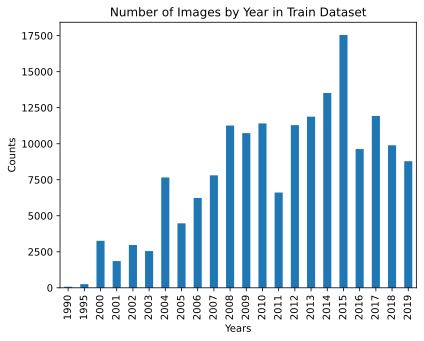

In [10]:
plot_dataframes(num_images_by_year_train_df, df_name="Train Dataset")

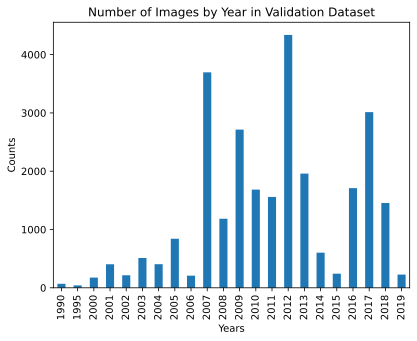

In [11]:
plot_dataframes(num_images_by_year_val_df, df_name="Validation Dataset")

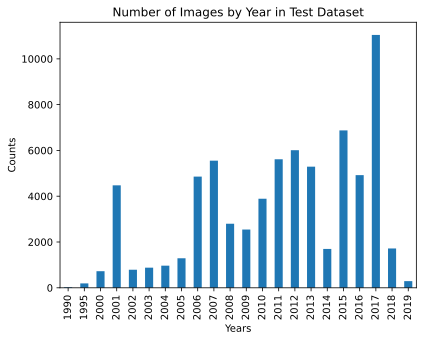

In [12]:
plot_dataframes(num_images_by_year_test_df, df_name="Test Dataset")

In [13]:
# plot stacked number of images by year per dataset 

# combine num_images_by_year_some_dataset dfs to one dataframe
num_images_by_year_all_data = num_images_by_year_train_df.to_frame().join(num_images_by_year_test_df.to_frame(), on="Launch_Year", lsuffix="_train", rsuffix="_test")
num_images_by_year_all_data = num_images_by_year_all_data.join(num_images_by_year_val_df.to_frame(), on="Launch_Year", rsuffix="_val")
num_images_by_year_all_data = num_images_by_year_all_data.rename(columns={"file_path_test":"Num Test Images", "file_path_train":"Num Train Images","file_path":"Num Validation Images"})
num_images_by_year_all_data

,Num Train Images,Num Test Images,Num Validation Images
Launch_Year,,,
1990,75,27,68
1995,252,191,41
2000,3259,725,175
2001,1855,4475,403
2002,2971,788,215
2003,2548,879,511
2004,7659,965,405
2005,4472,1291,842
2006,6238,4856,208


<AxesSubplot:title={'center':'Number of Images by Launch Year per Dataset'}, xlabel='Launch Year', ylabel='Counts'>

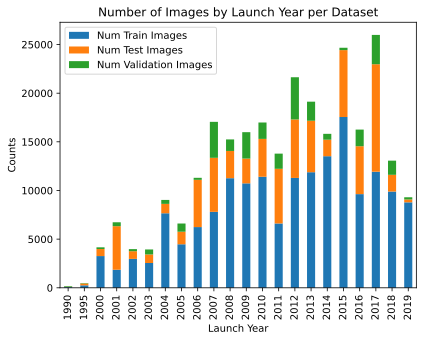

In [14]:
num_images_by_year_all_data.plot.bar(stacked=True, xlabel="Launch Year", ylabel="Counts", title="Number of Images by Launch Year per Dataset")

<AxesSubplot:title={'center':'Number of Images by Viewpoint per Dataset'}, xlabel='Viewpoint', ylabel='Counts'>

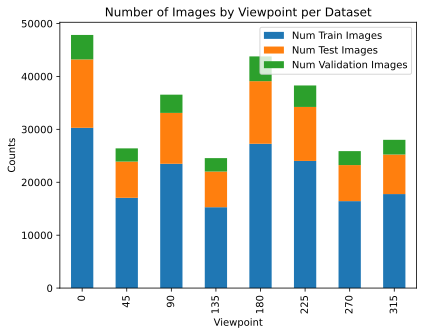

In [15]:
# plot stacked number of images by year per dataset 

# combine num_images_by_viewpointsome_dataset dfs to one dataframe
num_images_by_viewpoint_all_data = num_images_by_viewpoint_train_df.to_frame().join(num_images_by_viewpoint_test_df.to_frame(), on="Viewpoint", lsuffix="_train", rsuffix="_test")
num_images_by_viewpoint_all_data = num_images_by_viewpoint_all_data.join(num_images_by_viewpoint_val_df.to_frame(), on="Viewpoint", rsuffix="_val")
num_images_by_viewpoint_all_data = num_images_by_viewpoint_all_data.rename(columns={"file_path_test":"Num Test Images", "file_path_train":"Num Train Images","file_path":"Num Validation Images"})
num_images_by_viewpoint_all_data

num_images_by_viewpoint_all_data.plot.bar(stacked=True, xlabel="Viewpoint", ylabel="Counts", title="Number of Images by Viewpoint per Dataset")

In [16]:
from typing import Callable
from skimage import io
from data import data_cleaning, year2label_fn, bodytype2label_fn, CarDataset


# set bucket_size for year -> how many years should correspond to one label?
year_bucket_size = 2
min_year = data_df["Launch_Year"].min() # oldest car launch_year in data
max_year = data_df["Launch_Year"].max() # # most recent car launch_year in data
 
car_dataset = CarDataset(train_df,
    lambda year:year2label_fn(year, min_year = min_year, max_year = max_year, year_bucket_size=year_bucket_size), all_cars=True
    )

In [17]:
test_datapoint = car_dataset[1000] # idx 10300 exists in small image dataset

In [18]:
test_datapoint

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

Year:  2007, Type: Convertible, viewpiont:180


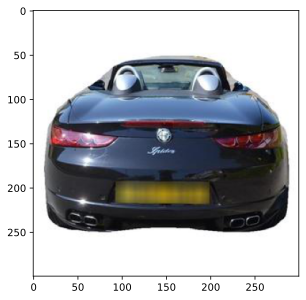

In [19]:
plt.imshow(test_datapoint[0])
print(f"Year:  {test_datapoint[-4]}, Type: {test_datapoint[-6]}, viewpiont:{test_datapoint[-1]}")

In [20]:
year2label_fn(2000, min_year=1990, max_year=2010,year_bucket_size=2)

4

In [21]:
bodytype2label_fn("Car Derived Van")

6

### Data augmentation and transformation:

In [22]:
# resize images to 224x224 (imageNet size)
# normalize image: 
# mean =[0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225] (ImgNet mean and std)
#optional: randomResizedCrop, etc.

# Data agumentation and normalization for training
img_rgb_mean=[0.485, 0.456, 0.406]
img_rgb_std = [0.229, 0.224, 0.225]

data_transforms = {
    "train":transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((224,224)),
            transforms.ColorJitter(),
            transforms.RandomInvert(),
            transforms.RandomPerspective(distortion_scale=0.1, p=0.1),
            transforms.Normalize(mean=img_rgb_mean,std = img_rgb_std),
        ]
    ),
    "val":transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((224,224)),
                        transforms.Normalize(mean=img_rgb_mean,std = img_rgb_std),

        ]
    )
}

def inverse_transform(y:torch.Tensor, mean:list, std:list):
    mean = torch.as_tensor(mean)
    std = torch.as_tensor(std)
    mean = torch.reshape(mean,[3,1,1])
    std = torch.reshape(std,[3,1,1])
    return y*std + mean

In [143]:
seed_t = 123
torch.manual_seed(seed_t)

# load dataset
# create torch.dataset --> specify transform arguement accordingly

train_set = CarDataset(features=train_df[:100], transform=data_transforms["train"],year2label_fn=lambda year:year2label_fn(year, min_year = min_year, max_year = max_year, year_bucket_size=year_bucket_size))

test_set = CarDataset(features=test_df[:100], transform=data_transforms["val"],year2label_fn=lambda year:year2label_fn(year, min_year = min_year, max_year = max_year, year_bucket_size=year_bucket_size))

val_set = CarDataset(features=val_df[:100], transform=data_transforms["val"],year2label_fn=lambda year:year2label_fn(year, min_year = min_year, max_year = max_year, year_bucket_size=year_bucket_size))


# data loaders for all train, test, val datasets
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=len(val_set), shuffle=True)

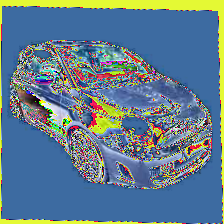

In [144]:
test_point_transf = train_set[0]
post_transf = torchvision.transforms.functional.to_pil_image(test_point_transf[0])
inv_transf = torchvision.transforms.functional.to_pil_image(inverse_transform(test_point_transf[0], mean=img_rgb_mean, std=img_rgb_std))
post_transf

In [145]:
(train_set[100])

IndexError: single positional indexer is out-of-bounds

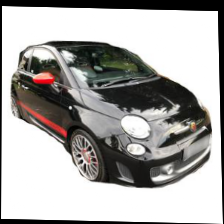

In [146]:
inv_transf

In [147]:
test_point_transf[0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489,  1.8984, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489,  2.1012, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.0461,  2.2457, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286,  2.0703, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286,  2.2776, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.2212,  2.4253, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [148]:
train_df.columns

Index(['Brand_Name', 'Brand_ID', 'Model_Name', 'Model_ID', 'Bodytype',
       'Launch_Year', 'Color', 'Advertiser_ID', 'Image_ID', 'Viewpoint',
       'file_path'],
      dtype='object')

In [149]:
# dataset dic
data_set_dic = dict({"train":train_set, "val":val_set, "test":test_set})

# dataloader dic

dataloader_dic = dict({"train":train_loader, "val":val_loader, "test":test_loader})

#  a dataloader has  the following attributes: 
# image, bodytype, model_id, launch_year, self.bodytype2label_fn(bodytype), self.year2label_fn(year=launch_year), viewpoint

In [150]:
len(next(iter(train_loader))[0])

32

## Model

In [5]:
from models import get_fine_tuneable_model, pretrained_model


# compute number of classes of final layer which depends on year_bucket size and year_range
year_range = max_year - min_year
num_year_classes = 1 +  (year_range // year_bucket_size) # floor division

my_model = get_fine_tuneable_model(num_classes=num_year_classes)


NameError: name 'max_year' is not defined

Replace final layer of Resnet18 with a new fully connected layer with number of features equal to the number of output classes and initialize with random weights.


In [152]:
module_counter = 0
for module in my_model.modules():
   print("MODULE", module_counter, "is:")
   print(module)
   module_counter += 1

MODULE 0 is:
Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
     

## define loss function, optimizer and learning rate

In [153]:
learning_rate = 5e-4

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(my_model.fc.parameters(), lr=learning_rate)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Tensorboard visualizations
see: https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [154]:
# from torch.utils.tensorboard import SummaryWriter

# # default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/0_experiment_car_year_classifcation')

##  training


In [61]:
# training loop 

import time

def train_model(model, criterion, optimizer, num_epochs=3, phase="train"):
    acc_per_batch_list = []
    loss_per_batch_list  =[]
    num_batches = 0
    epoch_acc_list = []
    epoch_loss_list = []
    time_list = []

    for epoch in range(num_epochs):
        start_time = time.time()

        # print epoch
        print(f"Epoch {epoch} of {num_epochs -1}")
        print("--" * 10)

        # each epoch has a training and validation phase
        if phase == "train":
            model.train() # set model to training mode

        else:
            model.eval() # set model to evaluation mode

        # for tracking performance
        running_loss = 0.0
        running_corrects = 0.0

        # iterate over data
        ## loop over inputs and labels in dataloaders (in dict form for training/test phase)

        #  a dataloader has  the following attributes: 
        # image, bodytype, model_id, launch_year, self.bodytype2label_fn(bodytype), self.year2label_fn(year=launch_year), viewpoint

        ## inputs and labels to device
        for inputs, _, _, _, _,year_labels, viewpoint in dataloader_dic[phase]:

            #print(inputs.shape)
 
            inputs = inputs.to(device)
            year_labels = year_labels.to(device)
    

            ## zero the parameters of the gradient
            optimizer.zero_grad()

            # forward pass
            # track history only if in train mode
            with torch.set_grad_enabled(phase=="train"):
                outputs = model(inputs)
                _, predictions = torch.max(outputs,1) # dim = 1
                loss = criterion(outputs, year_labels)
                # backward + optimize only when in training phase
                if phase == "train":
                    loss.backward()
                    optimizer.step()

            # Statistics:
            num_corrects = torch.sum(predictions == year_labels.data).item()
            running_corrects += num_corrects
            num_batches += 1
            acc_per_batch = num_corrects / inputs.size(0)
            loss_per_batch = loss.item()
            running_loss  += loss_per_batch
            loss_per_batch_list.append(loss_per_batch)
            acc_per_batch_list.append(acc_per_batch)


        epoch_loss = (running_loss / len(data_set_dic[phase]))
        epoch_acc = running_corrects / len(data_set_dic[phase]) #  .double() is equivalent to self.to(torch.float64)
        epoch_acc_list.append(epoch_acc)
        epoch_loss_list.append(epoch_loss)
        print(f"{phase}:, Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}")

        # record training time
        time_list.append(time.time() - start_time)
        print(f"Time up to epoch {epoch}: {time_list[epoch]}")
    
    return list(range(num_batches)), loss_per_batch_list, acc_per_batch_list, list(range(num_epochs)), epoch_loss_list, epoch_acc_list, time_list

    

In [62]:
train_num_batches_lst, train_loss_per_batch_lst, train_acc_per_batch_lst, train_num_epochs_lst, train_epoch_loss_lst, train_epoch_acc_lst, train_time_list = train_model(my_model, criterion=criterion, optimizer=optimizer, phase="train")

Epoch 0 of 2
--------------------
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([8, 3, 224, 224])
train:,

##  evaluation

In [63]:
val_num_batches_lst, val_loss_per_batch_lst, val_acc_per_batch_lst, val_num_epochs_lst, val_epoch_loss_lst, val_epoch_acc_lst, val_time_list = train_model(my_model, criterion=criterion, optimizer=optimizer, phase="val")

Epoch 0 of 2
--------------------
torch.Size([1000, 3, 224, 224])
val:, Loss: 0.0027 Accuracy: 0.0680
Time up to epoch 0: 81.00668406486511
Epoch 1 of 2
--------------------
torch.Size([1000, 3, 224, 224])
val:, Loss: 0.0027 Accuracy: 0.0680
Time up to epoch 1: 68.00365281105042
Epoch 2 of 2
--------------------
torch.Size([1000, 3, 224, 224])
val:, Loss: 0.0027 Accuracy: 0.0680
Time up to epoch 2: 83.03656077384949


In [66]:
# plotting function for accuracy and loss on training and validation data set

def plot(train_num_batches_lst, train_loss_per_batch_lst, train_acc_per_batch_lst, train_num_epochs_lst, train_epoch_loss_lst, train_epoch_acc_lst, time_list, val_epoch_loss_lst, val_epoch_acc_lst):

  fig, axes = plt.subplots(nrows=2, ncols=3, sharey="row")

  # batch
  axes[0,0].plot(train_num_batches_lst, train_loss_per_batch_lst, color="C0", label="train")
  axes[0,0].plot(val_num_batches_lst, val_loss_per_batch_lst, color="C1", label="validation")

  axes[1,0].plot(train_num_batches_lst, train_acc_per_batch_lst, color="C0", label="train")
  #axes[1,0].plot(val_num_batches_lst, val_accuracy_lst, color="C1", label="validation")

  # epoch
  axes[0,1].plot(train_num_epochs_lst, train_epoch_loss_lst, color="C0", label="train")
  axes[0,1].plot(train_num_epochs_lst, val_epoch_loss_lst, color="C1", label="validation")

  axes[1,1].plot(train_num_epochs_lst, train_epoch_acc_lst, color="C0", label="train")
  axes[1,1].plot(train_num_epochs_lst, val_epoch_acc_lst, color="C1", label="validation")

  # time
  axes[0,2].plot(time_list, train_epoch_loss_lst, color="C0", label="train")
  axes[0,2].plot(time_list, val_epoch_loss_lst, color="C1", label="validation")

  axes[1,2].plot(time_list, train_epoch_acc_lst, color="C0", label="train")
  axes[1,2].plot(time_list, val_epoch_acc_lst, color="C1", label="validation")

  axes[0,0].set(ylabel="CE-Loss", yscale="symlog")
  axes[1,0].set(xlabel="batches", ylabel="accuracy")
  axes[1,1].set(xlabel="epoch")
  axes[1,2].set(xlabel="time")
  axes[0,0].legend()
  axes[0,1].legend()
  axes[0,2].legend()
  plt.show()


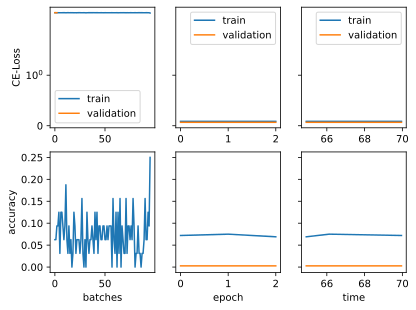

In [67]:
plot(
    train_num_batches_lst=train_num_batches_lst,
    train_loss_per_batch_lst=train_loss_per_batch_lst, 
    train_acc_per_batch_lst=train_acc_per_batch_lst, 
    train_epoch_loss_lst=train_epoch_loss_lst, 
    train_epoch_acc_lst=train_epoch_acc_lst, 
    train_num_epochs_lst=train_num_epochs_lst, 
    time_list = train_time_list,
    val_epoch_acc_lst=val_epoch_loss_lst,
    val_epoch_loss_lst=val_epoch_acc_lst
    )

## Modernity 
Design Modernity Score:
- Assumption:  
    - the newer the car (wrt procuction year), the more modern it is
- Calculation:
    - weighted sum of the production year category labels:
        weight labels (0, 1, 2, 3, etc.) by respective predicted probabilitiy 

In [68]:
def modernity_score_fn(prob_per_label: torch.Tensor):
    """gets model output from prediction of model and computes modernity score"""

    # modernity score = weighted sum of model_outputs times year_label 
    # year labels start with 0, so make sure to +1 each label
    year_labels = torch.arange(num_year_classes) + 1

    return torch.sum(year_labels * prob_per_label, dim=1)

In [70]:
# select test images
img_tens, body_type, _, launch_year, bodytype_label, year_label, view_angle = next(iter(dataloader_dic["test"]))

In [71]:
predicted_probs = my_model(img_tens)
predicted_probs.shape

torch.Size([1000, 15])

In [72]:
modernity_score_fn(predicted_probs)

tensor([0.1164, 0.1043, 0.1197, 0.1060, 0.1075, 0.1341, 0.0960, 0.1137, 0.1277,
        0.1375, 0.1043, 0.1099, 0.1084, 0.1140, 0.1474, 0.1444, 0.1073, 0.1532,
        0.1286, 0.1133, 0.1134, 0.1381, 0.1342, 0.1290, 0.1281, 0.1292, 0.1169,
        0.1231, 0.1330, 0.1252, 0.1056, 0.1350, 0.1385, 0.1370, 0.1076, 0.1206,
        0.1070, 0.1309, 0.1414, 0.1352, 0.1650, 0.1119, 0.1231, 0.1585, 0.1362,
        0.1102, 0.1680, 0.1060, 0.1212, 0.1241, 0.1175, 0.1386, 0.1102, 0.1402,
        0.0965, 0.1056, 0.1314, 0.1145, 0.1088, 0.1093, 0.1010, 0.0898, 0.1146,
        0.1407, 0.1043, 0.1212, 0.1266, 0.1173, 0.1127, 0.1135, 0.1241, 0.1286,
        0.1228, 0.1300, 0.0997, 0.1304, 0.0951, 0.1406, 0.1193, 0.1110, 0.1106,
        0.1145, 0.1125, 0.1283, 0.0789, 0.1065, 0.1148, 0.1118, 0.1161, 0.1110,
        0.1149, 0.1458, 0.1158, 0.1397, 0.1130, 0.1147, 0.1251, 0.1522, 0.1072,
        0.1090, 0.1325, 0.1294, 0.1344, 0.1117, 0.1097, 0.1322, 0.1067, 0.1132,
        0.1088, 0.1193, 0.1177, 0.0842, 

In [73]:
def imshow(img):
    img = inverse_transform(img,mean=img_rgb_mean, std=img_rgb_std)

    img = img.to("cpu")
    img = torchvision.utils.make_grid(img, nrow=4)
    npimg = img.numpy()
    # rotate image by transposing dimensions accordingly
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

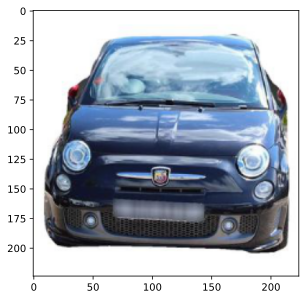

In [74]:
imshow(train_set[21][0])


In [75]:
my_model(img_tens).shape[-1]

15

In [76]:
# get random images per year

def get_random_img_per_year(year_of_interest:int, number:int=4, images=img_tens, years=launch_year):
    mask = year_of_interest == years 
    print(mask)
    if mask.sum() == 0:
        raise ValueError(f"Year {year_of_interest} does not exist in current batch.")
    images_per_year = images[mask]
    random_idx  = torch.randperm(sum(mask))[:number]
    return images_per_year[random_idx], years[mask][random_idx], random_idx

In [77]:
img_tens.shape

torch.Size([1000, 3, 224, 224])

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

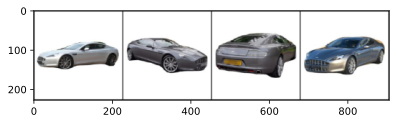

The modernity scores in year 2011 are: ['0.13', '0.17', '0.13', '0.12']


In [80]:
# print 4 random images and respective modernity score for years of interest (2000, 2006, 2010, 2014, 2017)

years_of_interest = [2011]
#years_of_interest = [2015]

for i, year in enumerate(years_of_interest):
    img_t, year_t, random_idx = get_random_img_per_year(year)
    print(f"YEAR: {years_of_interest[i]}")
    modernity_score = modernity_score_fn(predicted_probs[random_idx]).tolist()
    modernity_score = ["%.2f" % elem for elem in modernity_score]
    imshow(img_t)
    print(
        f"The modernity scores in year {year} are: {modernity_score}"
    )


# Which pixels of the input are the most salient for the classification task?
### Model Interpretability via feature attribution 
#### Saliency Map:

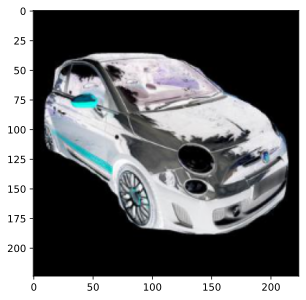

In [185]:
img_tens, _, _, _, _, _, _ = next(iter(train_set))
img_tens = img_tens.unsqueeze(0)
imshow(img_tens.detach())

In [200]:

# Select model
model = models.resnet18(pretrained=True)

# Turn off the gradients since we are using a trained model
for param in model.parameters():
    param.requires_grad = False

# Set the model to evaluation mode
model.eval()

# Saliency map: Calculate gradients of model output wrt input

# Need gradients wrt input image
img_tens.requires_grad = True

# Optional improvement: "Guided backpropagation" (https://www.coderskitchen.com/guided-backpropagation-with-pytorch-and-tensorflow/)
# Idea: zero out negative gradients of ReLU layers
# def relu_hook_function(module, grad_in, grad_out):
#     """Zero out negative gradients for any ReLU units in backward pass."""
#     if isinstance(module, torch.nn.ReLU):
#         return (torch.clamp(grad_in[0], min=0.0),)


# for i, module in enumerate(model.modules()):
#     """Modify backward pass with ReLU hook."""
#     if isinstance(module, torch.nn.ReLU):
#         print(model.named_modules())
#         module.register_backward_hook(relu_hook_function)

# Forward pass to calculate predictions
preds = model(img_tens)
score, indices = torch.max(preds, 1)

# Backward pass to get gradients of class scores wrt input image
score.backward()

# Compute saliency map
#slc, _ = torch.max(torch.abs(img_tens.grad[0]), dim=0)

slc, _ = torch.max(torch.clamp(img_tens.grad[0], min=0.0), dim=0)
slc = (slc - slc.min()) / (slc.max() - slc.min()) # normalize

/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [196]:
img_tens.grad[0].shape

torch.Size([3, 224, 224])

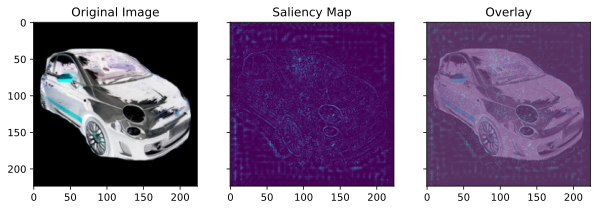

In [201]:
# plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharex="row", sharey="row")

input_transformed_for_plot = np.transpose(
    inverse_transform(img_tens, mean=img_rgb_mean, std=img_rgb_std)
    .detach()
    .numpy()
    .squeeze(),
    (1, 2, 0),
)

axs[0].imshow(input_transformed_for_plot)
axs[1].imshow(slc, cmap="viridis")
# overly input image with saliency map
axs[2].imshow(input_transformed_for_plot, alpha=0.75)
axs[2].imshow(slc, alpha=0.75)

axs[0].set(title="Original Image")
axs[1].set(title="Saliency Map")
axs[2].set(title="Overlay")
plt.show()